<a href="https://colab.research.google.com/github/f247805/DeepLearning/blob/main/DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model


In [7]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
BASE_DIR = '/content/utkface-new/UTKFace'

In [10]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)


  0%|          | 0/23708 [00:00<?, ?it/s]

In [11]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/utkface-new/UTKFace/27_0_3_2017010423...,27,0
1,/content/utkface-new/UTKFace/27_0_3_2017011921...,27,0
2,/content/utkface-new/UTKFace/3_1_0_20170109192...,3,1
3,/content/utkface-new/UTKFace/32_0_3_2017011920...,32,0
4,/content/utkface-new/UTKFace/21_0_1_2017011621...,21,0


In [12]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

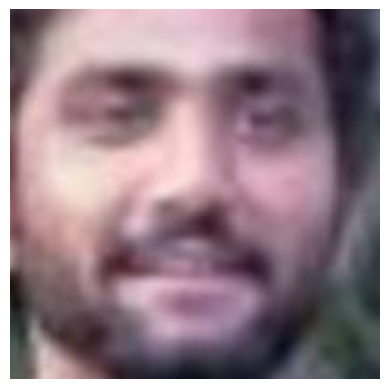

In [13]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

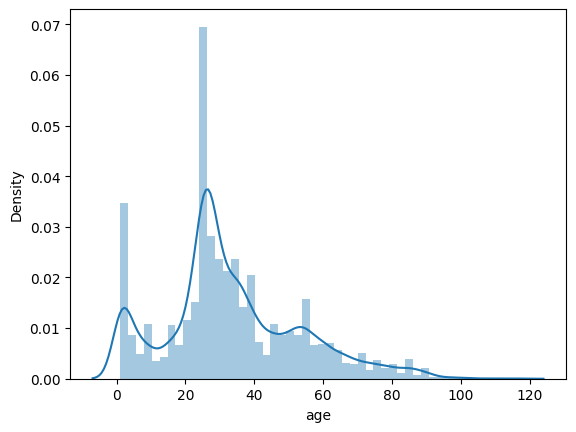

In [14]:
sns.distplot(df['age'])

In [ ]:


sns.countplot(df['gender'])

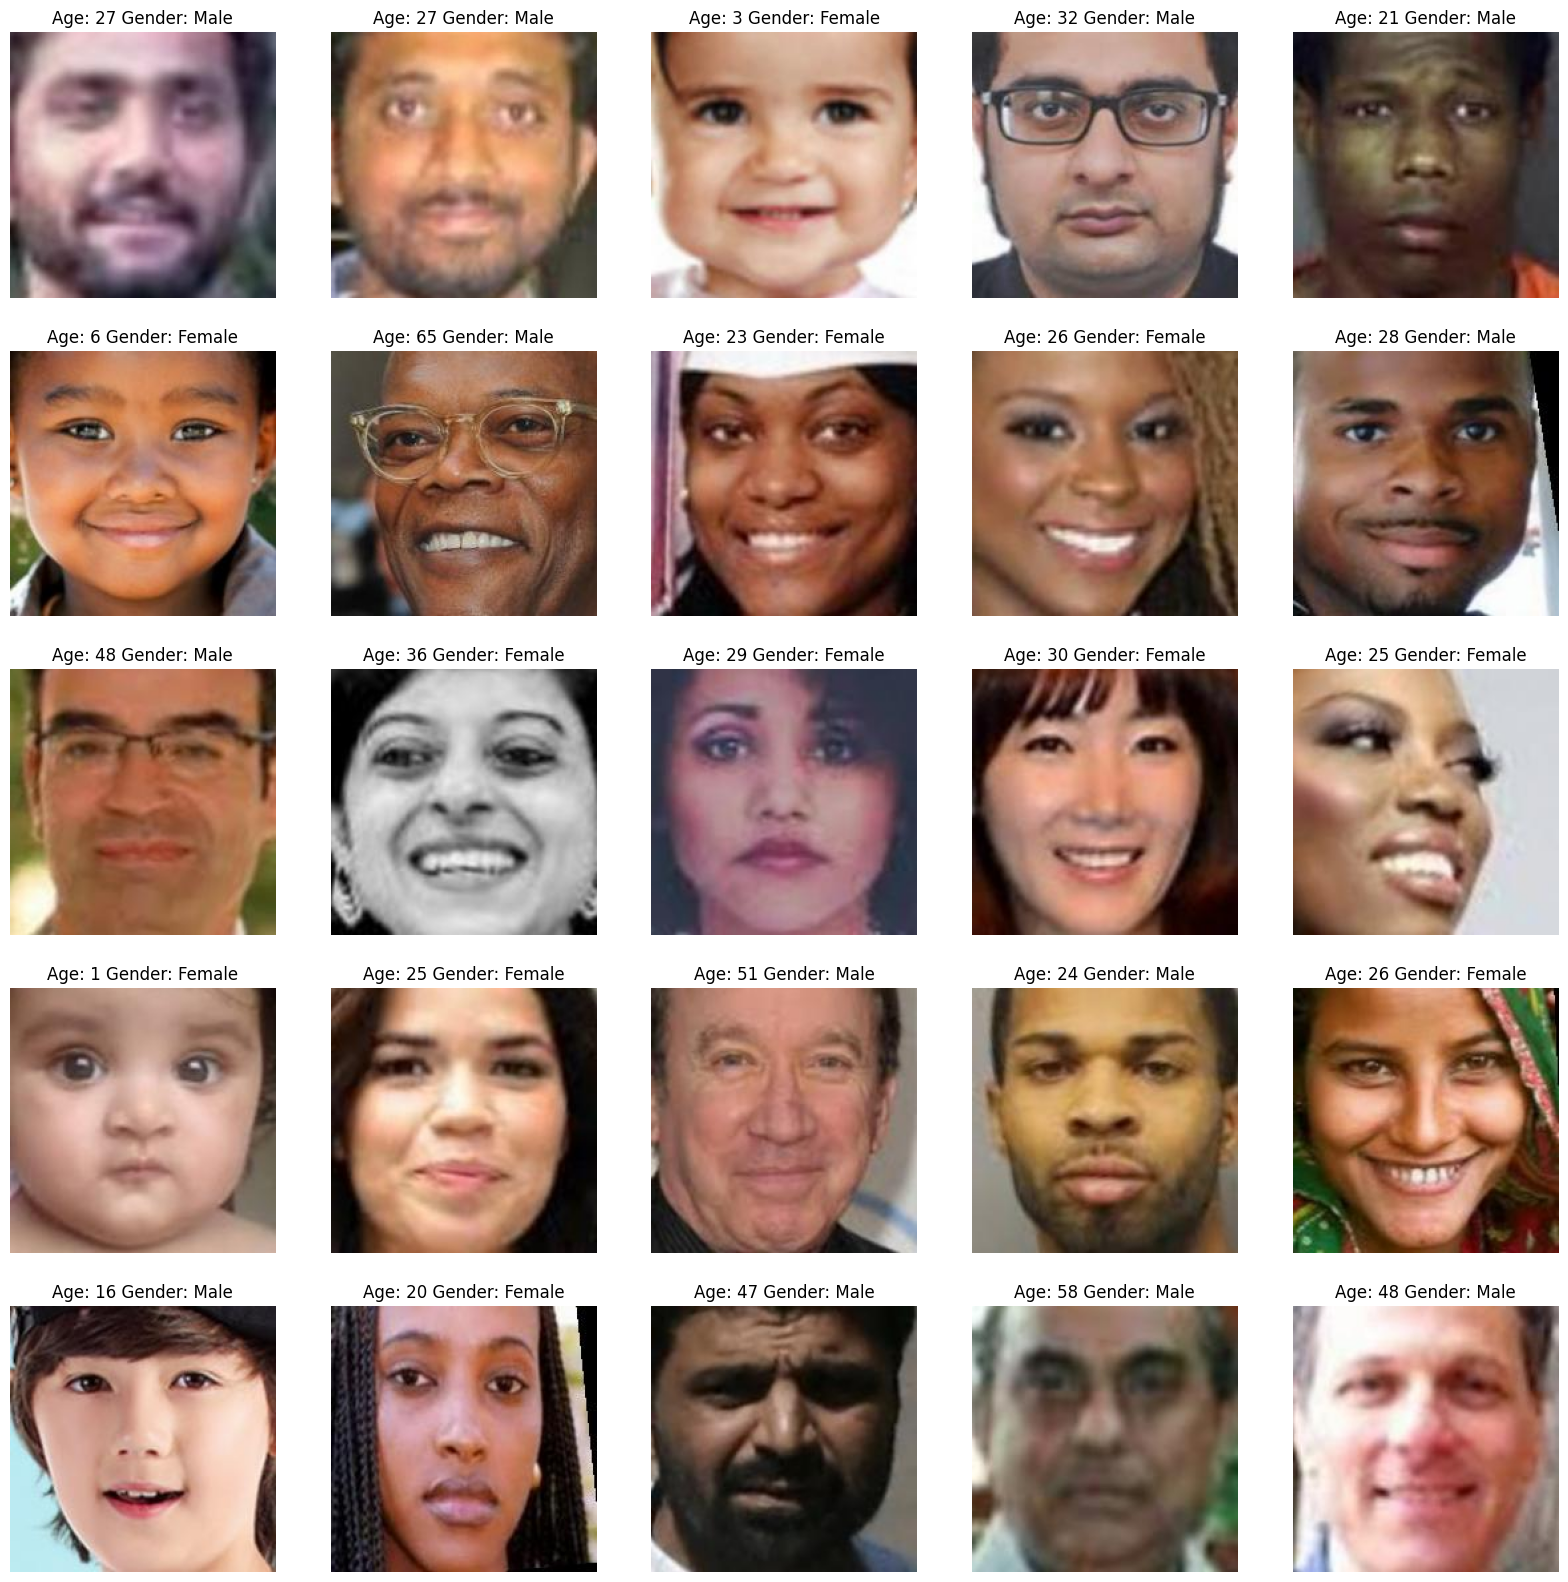

In [16]:
import matplotlib.pyplot as plt

# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [17]:
import numpy as np
from PIL import Image
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = Image.open(image).convert('L')  # Open image in grayscale mode
        img = img.resize((128, 128), Image.ANTIALIAS)  # Resize image
        img = np.array(img)  # Convert image to numpy array
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)  # Reshape features if using as input to a convolutional neural network
    return features


In [18]:
X = extract_features(df['image'])

100%|██████████| 23708/23708 [00:25<00:00, 931.55it/s] 


In [19]:
X.shape

(23708, 128, 128, 1)

In [20]:
# normalize the images
X = X/255.0

In [21]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [22]:
input_shape = (128, 128, 1)

In [23]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

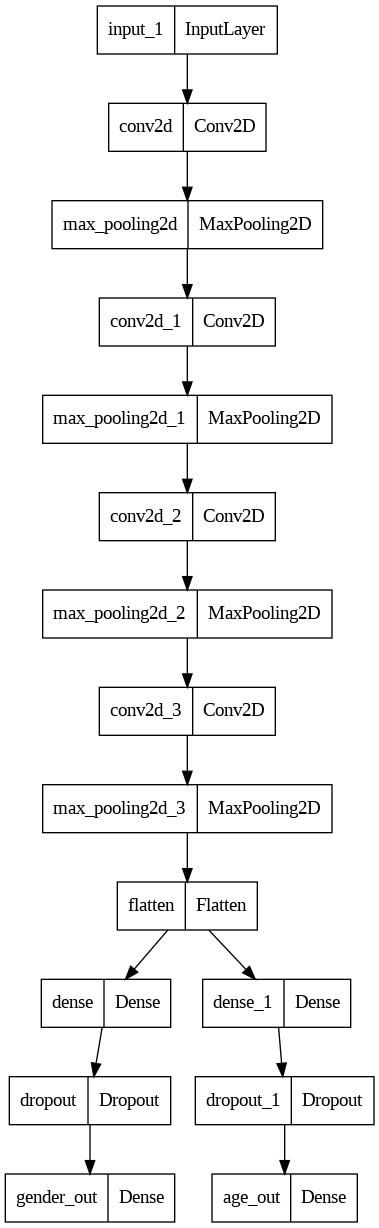

In [24]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [25]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 23s 24ms/step - loss: 15.5031 - gender_out_loss: 0.6826 - age_out_loss: 14.8205 - gender_out_accuracy: 0.5412 - gender_out_mae: 0.4860 - age_out_accuracy: 0.0469 - age_out_mae: 14.8205 - val_loss: 12.6840 - val_gender_out_loss: 0.5560 - val_age_out_loss: 12.1280 - val_gender_out_accuracy: 0.7212 - val_gender_out_mae: 0.3941 - val_age_out_accuracy: 0.0485 - val_age_out_mae: 12.1280
Epoch 2/30
593/593 [==============================] - 12s 21ms/step - loss: 11.3759 - gender_out_loss: 0.5202 - age_out_loss: 10.8557 - gender_out_accuracy: 0.7508 - gender_out_mae: 0.3499 - age_out_accuracy: 0.0309 - age_out_mae: 10.8557 - val_loss: 9.5992 - val_gender_out_loss: 0.4741 - val_age_out_loss: 9.1251 - val_gender_out_accuracy: 0.7718 - val_gender_out_mae: 0.3180 - val_age_out_accuracy: 0.0167 - val_age_out_mae: 9.1251
Epoch 3/30
593/593 [==============================] - 12s 21ms/step - loss: 9.5978 - gender_out_loss: 0.4235 - age_out_loss: 9.

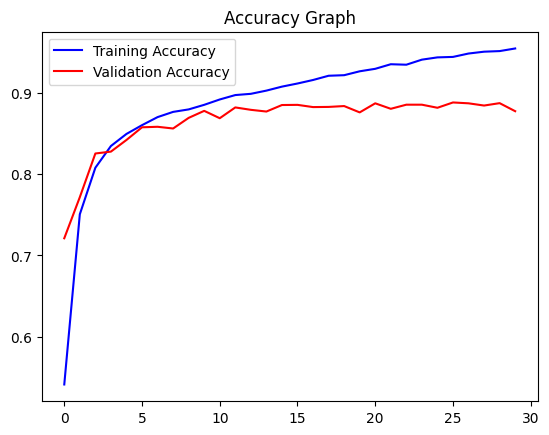

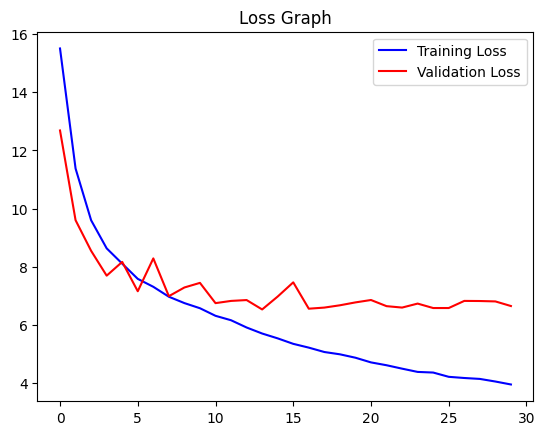

In [26]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

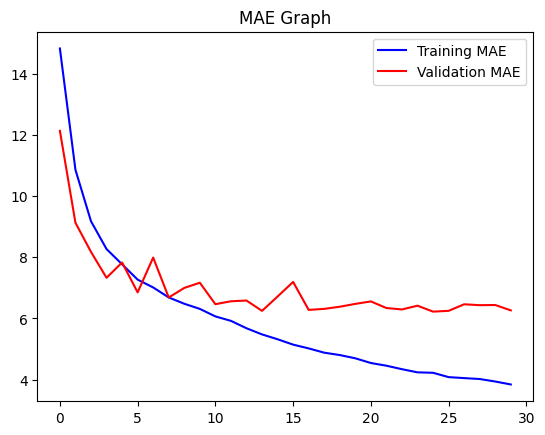

In [27]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 3
1/1 [==============================] - 0s 420ms/step
Predicted Gender: Male Predicted Age: 1


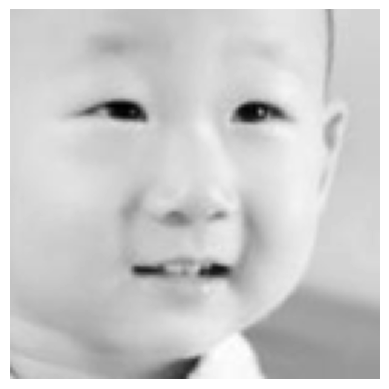

In [28]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 22
1/1 [==============================] - 0s 61ms/step
Predicted Gender: Male Predicted Age: 24


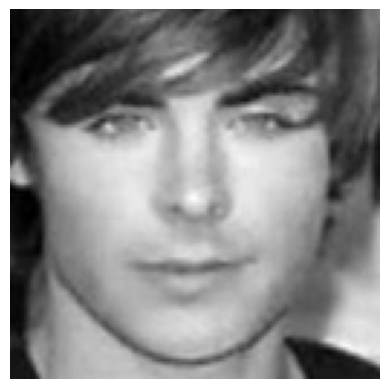

In [29]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 27
1/1 [==============================] - 0s 152ms/step
Predicted Gender: Male Predicted Age: 22


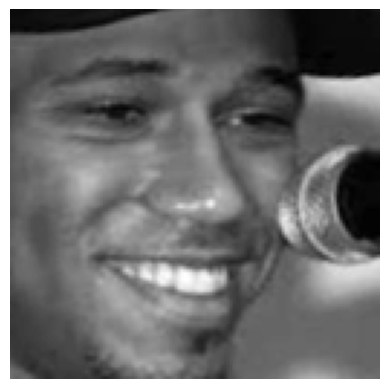

In [30]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');